<a href="https://colab.research.google.com/github/SashanthMogre/Basic-data-analysis/blob/main/innercity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('innercity.xlsx')
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,1800.0,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,670.0,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,3040.0,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,1740.0,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,1120.0,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [3]:
df.shape

(21613, 23)

In [4]:
df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated          int64
zipcode               int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

In [5]:
df.total_area.value_counts()

$         39
6770      19
7330      19
8750      19
9060      19
          ..
10002      1
26388      1
10005      1
10006      1
425986     1
Name: total_area, Length: 11145, dtype: int64

In [6]:
df = df[df['total_area'] != '$']

In [7]:
df.room_bed = df.room_bed.astype('object')
df.room_bath = df.room_bath.astype('object')
df.sight = df.sight.astype('object')
df.quality = df.quality.astype('object')
df.yr_renovated = df.yr_renovated.astype('object')
df.furnished = df.furnished.astype('object')
df.total_area = df.total_area.astype('float64')

In [8]:
df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed             object
room_bath            object
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight                object
condition            object
quality              object
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated         object
zipcode               int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished            object
total_area          float64
dtype: object

In [9]:
# 3)a)
df.drop(['cid','dayhours','zipcode','lat','long'],axis=1,inplace=True)

In [10]:
df.describe()

,price,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area
count,2.157400e+04,21557.000000,2.153200e+04,21573.000000,21573.000000,21408.000000,21545.000000,2.154500e+04
mean,5.401813e+05,2080.009881,1.511132e+04,1788.551801,291.486349,1987.061612,12769.939197,1.719204e+04
std,3.674777e+05,918.779272,4.145891e+04,828.359724,442.506712,685.713970,27308.974913,4.162869e+04
min,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,399.000000,651.000000,1.423000e+03
25%,3.219625e+05,1430.000000,5.040000e+03,1190.000000,0.000000,1490.000000,5100.000000,7.032000e+03
50%,4.500000e+05,1910.000000,7.617000e+03,1560.000000,0.000000,1840.000000,7620.000000,9.575000e+03
75%,6.450000e+05,2550.000000,1.067975e+04,2210.000000,560.000000,2360.000000,10084.000000,1.300000e+04
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000,1.652659e+06


In [11]:
#  we see there are few missing values and also the mean of each variable are different.

In [12]:
df.describe(include=object)

,room_bed,room_bath,ceil,coast,sight,condition,quality,yr_built,yr_renovated,furnished
count,21466.0,21466.0,21532,21573,21517.0,21517,21573.0,21573,21574,21545.0
unique,13.0,30.0,7,3,5.0,6,12.0,117,70,2.0
top,3.0,2.5,1,0,0.0,3,7.0,2014,0,0.0
freq,9744.0,5346.0,10629,21383,19401.0,13957,8967.0,559,20662,17304.0


In [13]:
# 3)b)
Total = df.isnull().sum().sort_values(ascending=False) 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False) 
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
living_measure15,166,0.769445
room_bed,108,0.500603
room_bath,108,0.500603
condition,57,0.264207
sight,57,0.264207
lot_measure,42,0.194679
ceil,42,0.194679
furnished,29,0.134421
total_area,29,0.134421
lot_measure15,29,0.134421


In [14]:
# percentage of missing value is to less so we can drop them.

In [15]:
df.dropna(inplace=True)

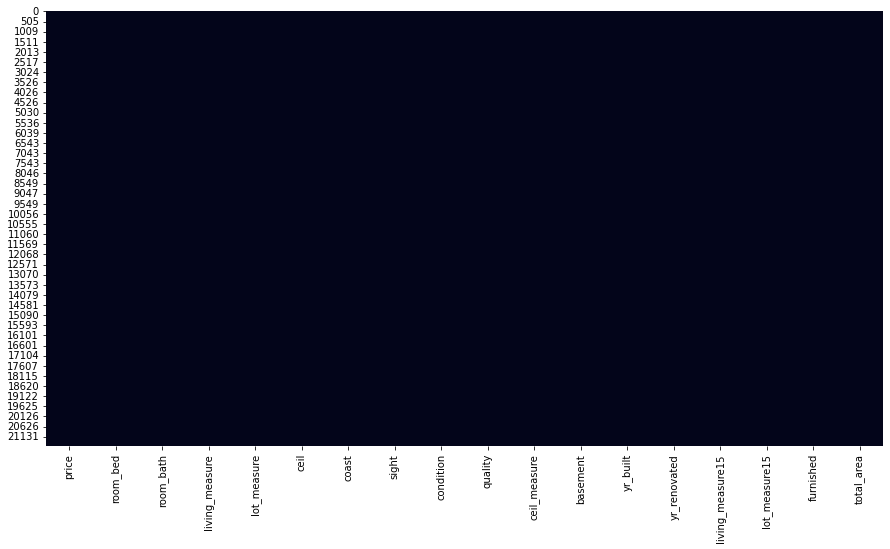

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [17]:
df.isnull().sum().sum()

0

In [18]:
# 3)d)
df_features = df.drop('price',axis=1)
df_target = df['price']

In [19]:
df_features.head(3)

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,living_measure15,lot_measure15,furnished,total_area
0,4,1.75,3050.0,9440.0,1,0,0,3,8,1800.0,1250.0,1966,0,2020.0,8660.0,0,12490.0
1,2,1,670.0,3101.0,1,0,0,4,6,670.0,0.0,1948,0,1660.0,4100.0,0,3771.0
2,4,2.75,3040.0,2415.0,2,1,4,3,8,3040.0,0.0,1966,0,2620.0,2433.0,0,5455.0


In [20]:
df_target.head(3)

0    600000
1    190000
2    735000
Name: price, dtype: int64

In [21]:
df_num = df_features.select_dtypes(np.number)

In [22]:
df_catg=df_features.select_dtypes(object)

In [23]:
df_num.head(3)

,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area
0,3050.0,9440.0,1800.0,1250.0,2020.0,8660.0,12490.0
1,670.0,3101.0,670.0,0.0,1660.0,4100.0,3771.0
2,3040.0,2415.0,3040.0,0.0,2620.0,2433.0,5455.0


In [24]:
df_catg.head(3)

,room_bed,room_bath,ceil,coast,sight,condition,quality,yr_built,yr_renovated,furnished
0,4,1.75,1,0,0,3,8,1966,0,0
1,2,1,1,0,0,4,6,1948,0,0
2,4,2.75,2,1,4,3,8,1966,0,0


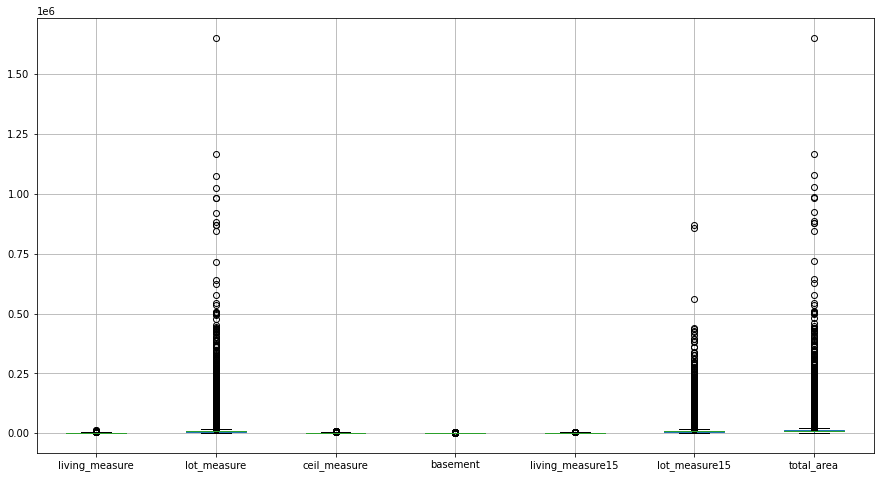

In [25]:
plt.rcParams['figure.figsize'] = (15,8)
df_num.boxplot()

In [26]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

living_measure      1120.00
lot_measure         5644.25
ceil_measure        1020.00
basement             560.00
living_measure15     870.00
lot_measure15       4983.00
total_area          5964.25
dtype: float64


In [27]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
df.shape

(17871, 18)

In [29]:
df_features = df.drop('price',axis=1)
df_target = df['price']
df_num = df_features.select_dtypes(np.number)
df_catg=df_features.select_dtypes(object)

In [30]:
# univariate analysis

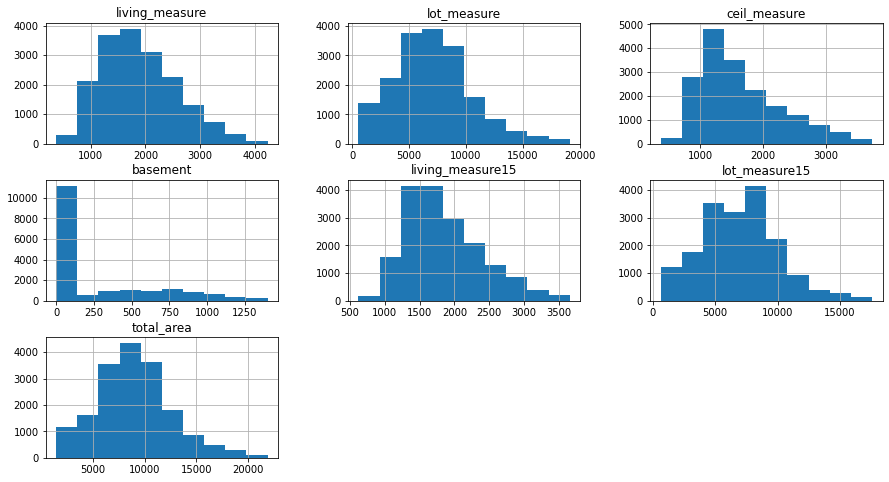

In [31]:
df_num.hist()
plt.show()

In [32]:
print('Skewness : ')
df_num.skew()

Skewness : 


living_measure      0.546825
lot_measure         0.572748
ceil_measure        0.893635
basement            1.198014
living_measure15    0.740740
lot_measure15       0.386728
total_area          0.496450
dtype: float64

In [33]:
len(df_catg.columns)

10

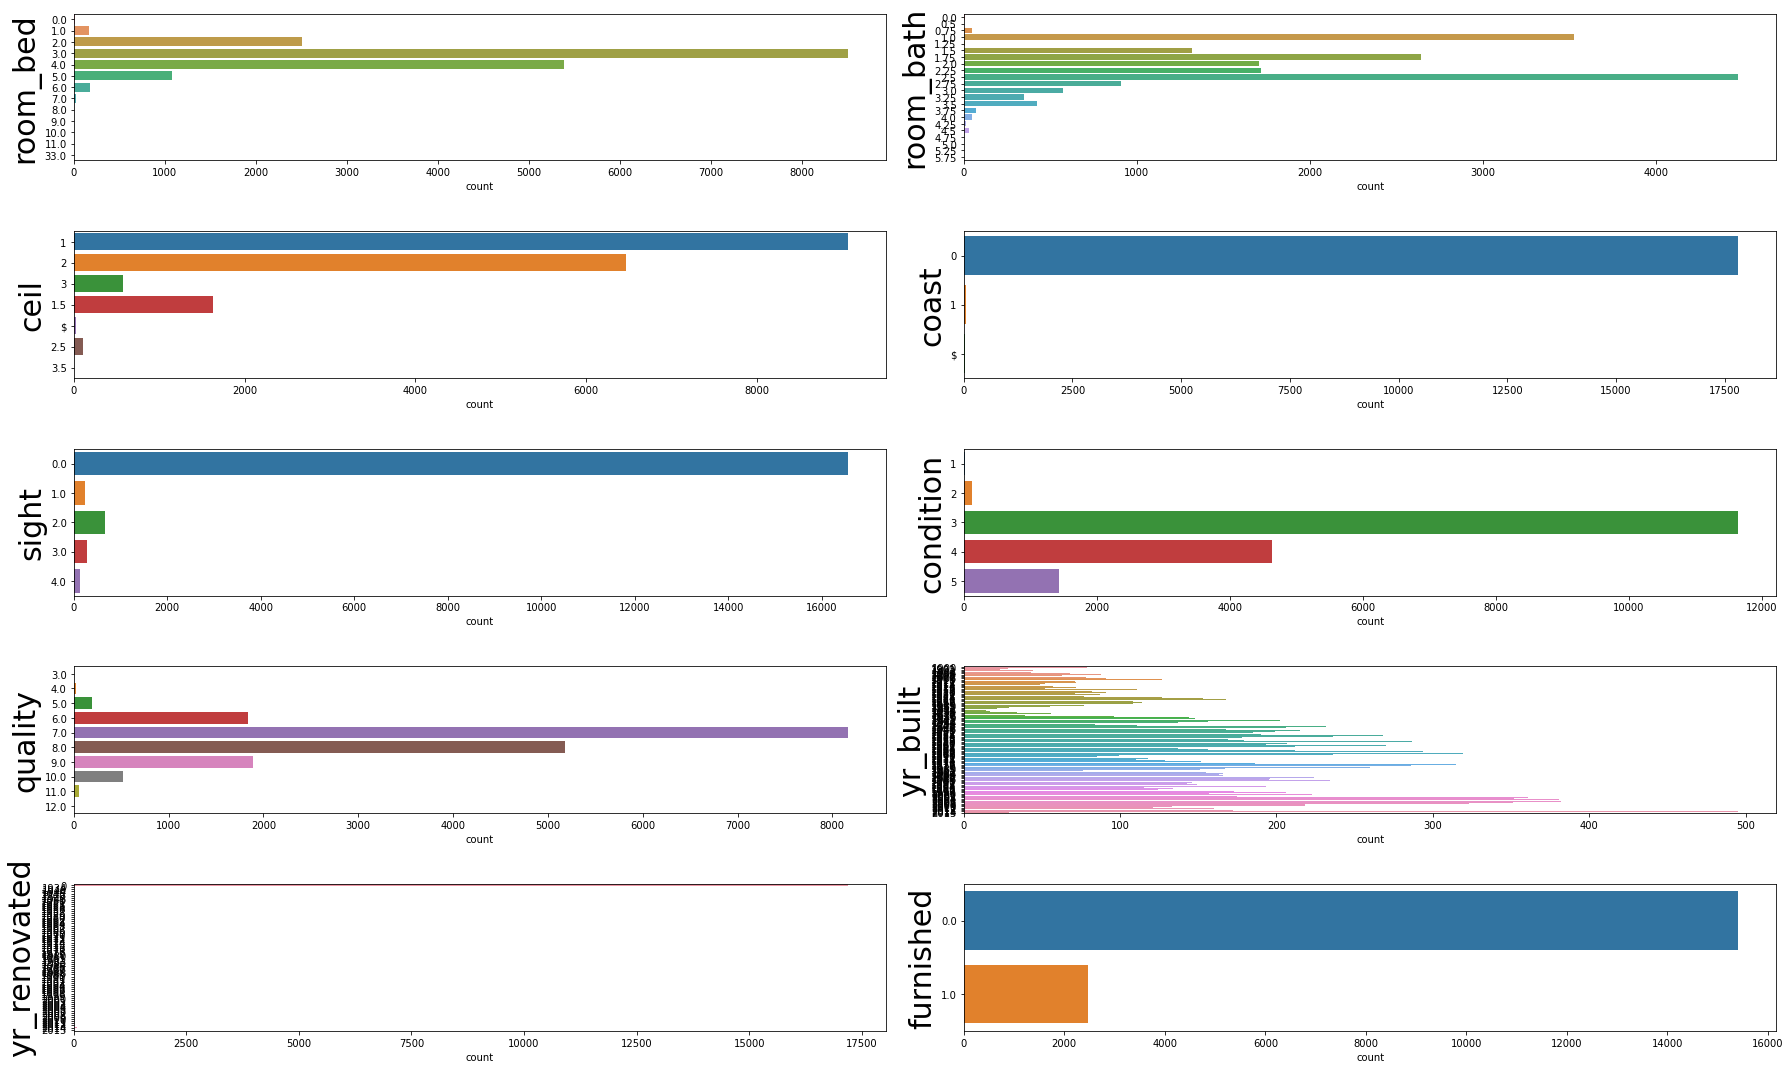

In [34]:
fig, ax = plt.subplots(5,2 , figsize=(25, 15))
for variable, subplot in zip(df_catg, ax.flatten()):
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)  
plt.tight_layout()   
plt.show()

In [35]:
# bivariate

In [36]:
corr =  df_num.corr()
corr

,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area
living_measure,1.000000,0.191009,0.844961,0.369979,0.724704,0.172475,0.371304
lot_measure,0.191009,1.000000,0.157358,0.077681,0.241790,0.873568,0.982338
ceil_measure,0.844961,0.157358,1.000000,-0.184259,0.701217,0.142842,0.309919
basement,0.369979,0.077681,-0.184259,1.000000,0.113749,0.068837,0.144007
living_measure15,0.724704,0.241790,0.701217,0.113749,1.000000,0.262694,0.366862
lot_measure15,0.172475,0.873568,0.142842,0.068837,0.262694,1.000000,0.859210
total_area,0.371304,0.982338,0.309919,0.144007,0.366862,0.859210,1.000000


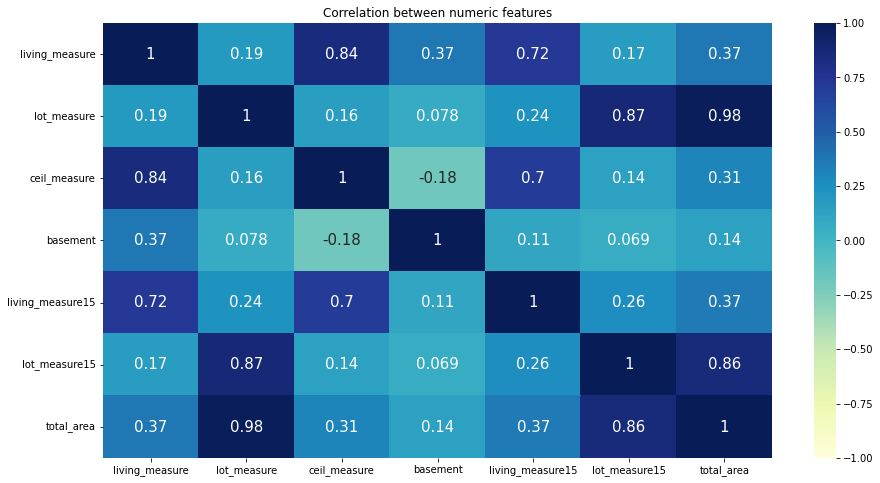

In [37]:
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
plt.title('Correlation between numeric features')
plt.show()

In [38]:
# relationship between target and categorical variables

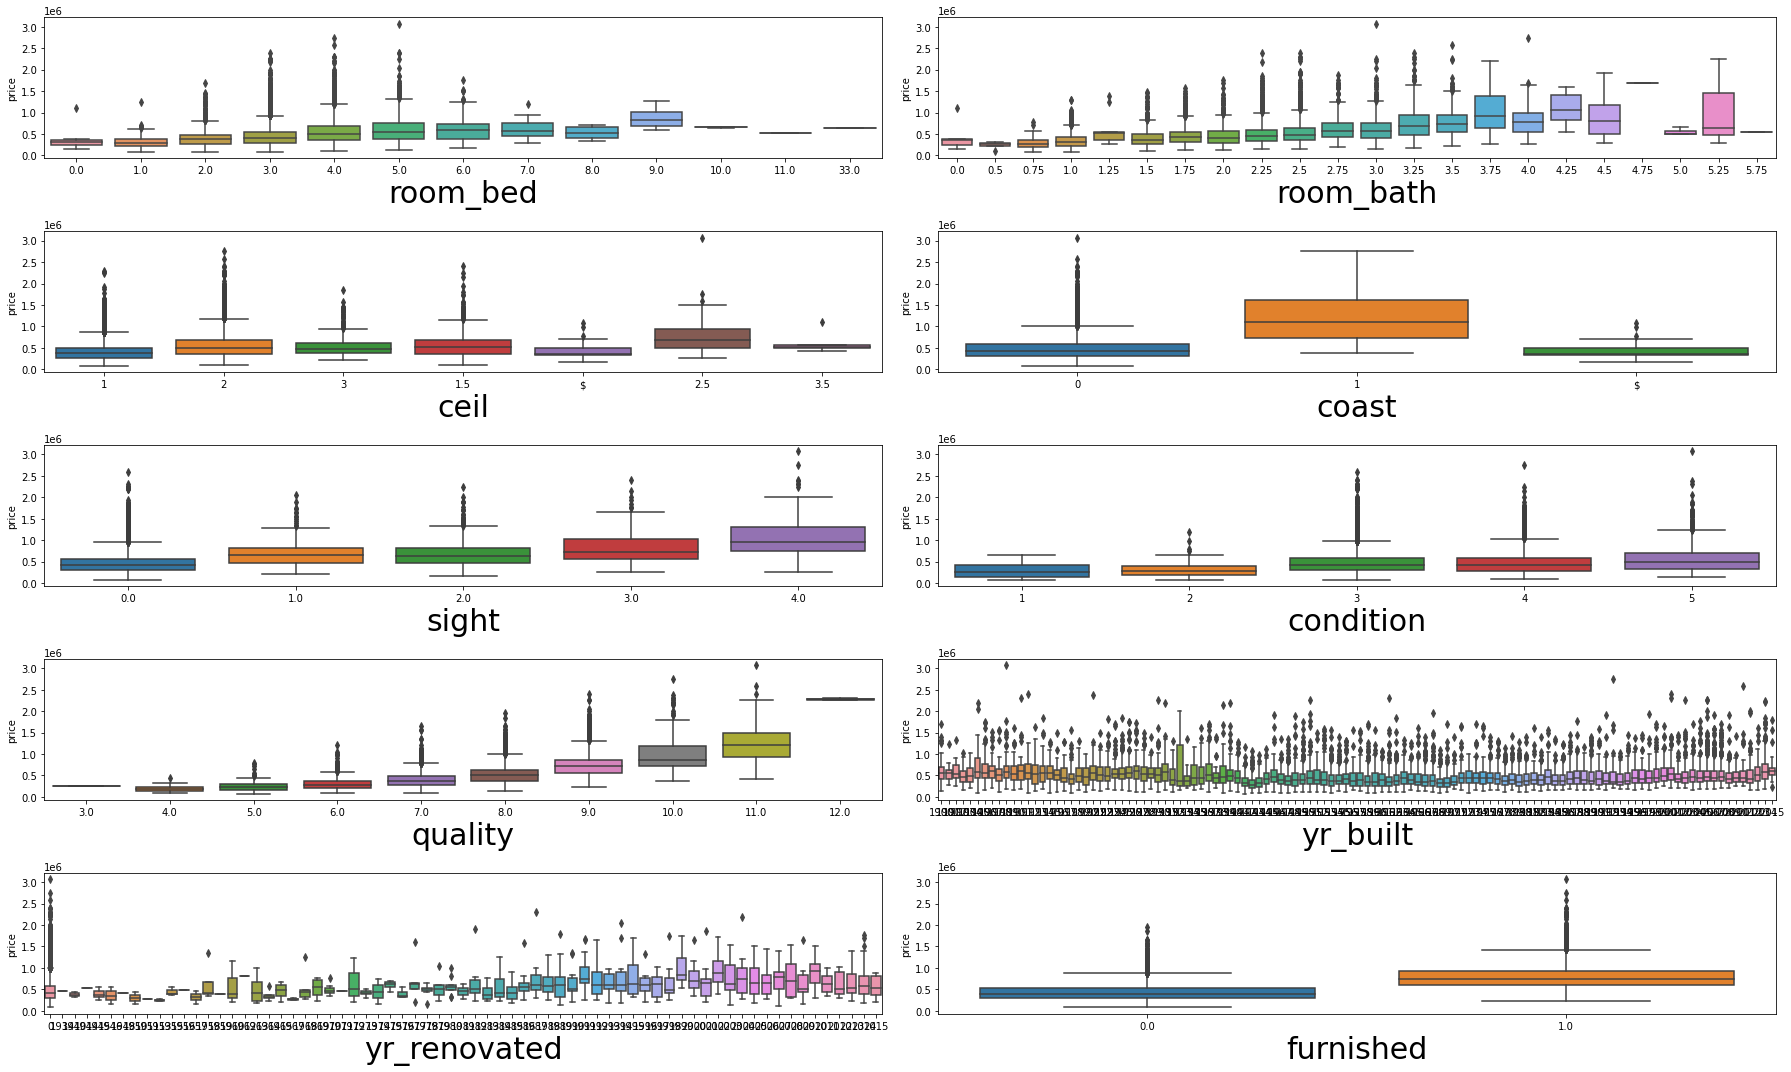

In [39]:
fig, ax = plt.subplots(5, 2, figsize=(25, 15))
for variable, subplot in zip(df_catg, ax.flatten()):
    boxplt = sns.boxplot(x=variable, y='price', data=df, ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 30)   
plt.tight_layout()   
plt.show() 

In [47]:
# 4)a)